# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
import matplotlib.pyplot as plt

In [11]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Рассмотрим зависимость возраста от индекса массы тела

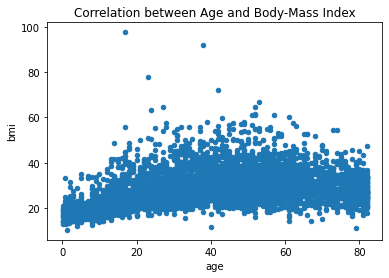

In [48]:
df.plot(kind='scatter',
        x='age',
        y='bmi',
        title='Correlation between Age and Body-Mass Index'
)
plt.show()

С возрастом организм человека более склонен к ожирению, при этом, после 60 лет диапазон индексов сужается - очевидно, среди доживших до почтенного возраста людей ожирение не так распространено.

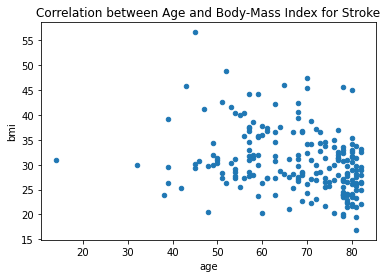

In [27]:
df.loc[df['stroke'] == 1, :].plot(kind='scatter',
        x='age',
        y='bmi',
        title='Correlation between Age and Body-Mass Index for Stroke'
)
plt.show()

Корелляция сохраняется и для наблюдений с приступом - при этом, возраст оказывает решающее влияние на частоту случаев, в то время как предожирение (ИМТ >25) всерьёз увеличивает вероятность приступа

<AxesSubplot:title={'center':'Glucose Level distribution'}>

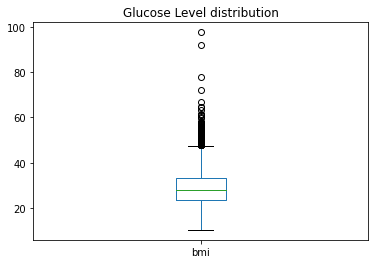

In [50]:
df['bmi'].plot(kind='box',
            title='BMI distribution')

Этот вывод подтверждается и анализом выбросов - медианное значение ИМТ находится на уровне 25, так что ожирение и предожирение действительно серьёзно увеличивают вероятность приступа

Теперь проверим, есть ли взаимосвязь между курением и местом работы. При этом, уберём тех, кто никогда не работал (из-за маленькой выборки) и детей, а также тех, о ком нет сведений о курении (поскольку они не дадут адекватной статистики).

In [51]:
import seaborn as sns

In [76]:
smoking_work_type = df.loc[(df['smoking_status'] != 'Unknown') &
                           (~df['work_type'].isin(['Never_worked', 'children'])), :].pivot_table(
    index='work_type',
    columns='smoking_status',
    values='stroke',
    aggfunc=lambda x: sum(x) / len(x)
).fillna(0)
smoking_work_type

smoking_status,formerly smoked,never smoked,smokes
work_type,,,
Govt_job,0.060150,0.042553,0.041667
Private,0.080979,0.039637,0.053407
Self-employed,0.091346,0.090634,0.064516


<AxesSubplot:xlabel='smoking_status', ylabel='work_type'>

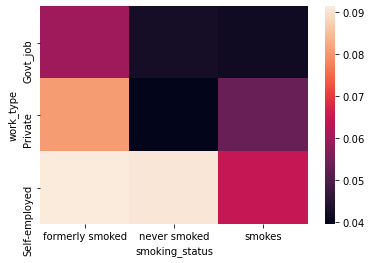

In [77]:
sns.heatmap(smoking_work_type)

Для всех категорий работников обращает на себя внимание тот факт, что бросив курить, они увеличивают вероятность инфаркта даже относительно тех, кто является активным курильщиком. При этом, работа в правительстве является наиболее благоприятной - возможно, там люди получают меньше стресса, либо более качественное медицинское обслуживание. На последнее указывает неблагоприятная статистика для самозанятых - они боле других подвержены приступам.

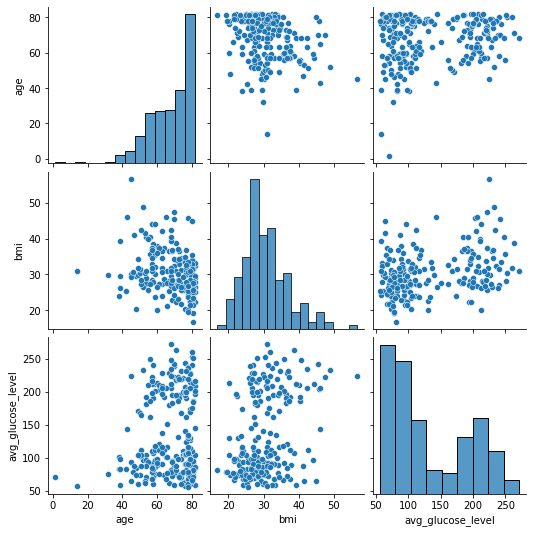

In [81]:
scatter_data = df.loc[
    df['stroke']==1,
    ['smoking_status', 'age', 'bmi', 'avg_glucose_level']
]
sns.pairplot(scatter_data)

Рассмотрим матрицу графиков для случаев с приступами. Как было выяснено ранее, возраст является наиболее характерным индикатором: все случаи сгрупированы в более позднем возрасте. Для ИМТ подтверждаются выводы, сделанные ранее - преоджирение так же является признаком. А вот уровень сахара в крови показал довольно необычную картину: Как пониженный, так и повышенный уровень может провоцировать сердечные приступы. А при уровне сахара в крови около 150 вероятность приступа снижается.

<AxesSubplot:xlabel='age'>

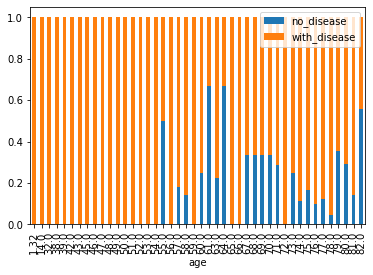

In [94]:
strokes_by_disease = df.loc[df['stroke'] == 1, ['heart_disease','stroke', 'age']].groupby('age').sum()
strokes_by_disease['no_disease'] = strokes_by_disease['heart_disease']/strokes_by_disease['stroke']
strokes_by_disease['with_disease'] = 1 - strokes_by_disease['no_disease']
strokes_by_disease.drop(['stroke', 'heart_disease'], axis=1).plot(kind='bar', stacked=True)


С возрастом сердечные проблемы становятся более актуальными, но чем старше пациент, тем реже сердечные болезни сопровождают приступы.

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.